In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
tf.random.set_seed(42)

x = np.arange(-100,100,4)
y = np.arange(-90, 110, 4)

x_train, x_test, y_train, y_test = x[:40],x[40:],y[:40],y[40:]
x_train= tf.expand_dims(x_train,-1)

In [ ]:
# Function for Mae and Mse

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

In [ ]:
# Creating FUnction for Plotting or Visualizing The Prediction
y_pred = 0
def plot_prediction(train_data= x_train,train_label = y_train, test_data = x_test, test_label = y_test,predictions=y_pred):
  plt.scatter(train_data, train_label, c="b", label="Training")
  plt.scatter(test_data, test_label, c="g", label="Testing")
  plt.scatter(test_data, predictions, c="r", label="Predicting")
  plt.legend()
  plt.show()

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(x_train, y_train, epochs=100, verbose=0)

In [ ]:
y_pred1 = model_1.predict(x_test)
mae(y_test,y_pred1)

1/1 [==============================] - 0s 235ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=8.579647>

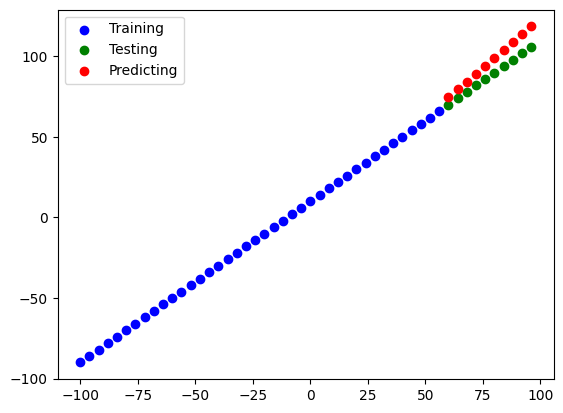

In [ ]:
plot_prediction(predictions=y_pred1)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# Fit the model
model_2.fit(x_train, y_train, epochs=100, verbose=0) # set verbose to 0 for less output

In [ ]:
y_pred2 = model_2.predict(x_test)
mae(y_test,y_pred2)

1/1 [==============================] - 0s 158ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=2.0563545>

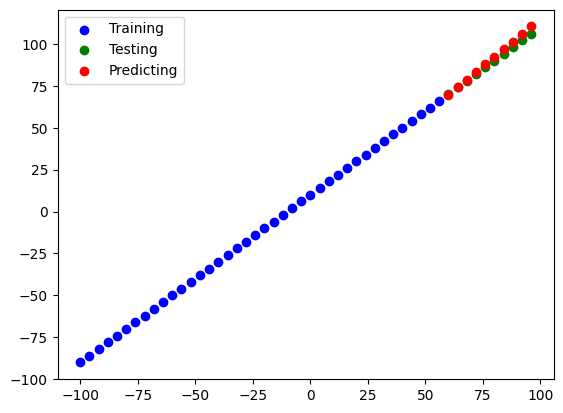

In [ ]:
plot_prediction(predictions = y_pred2)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# Fit the model
model_3.fit(x_train, y_train, epochs=500, verbose=0) # set verbose to 0 for less output

In [ ]:
y_pred3 = model_3.predict(x_test)
mae(y_test,y_pred3)

1/1 [==============================] - 0s 80ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=67.99922>

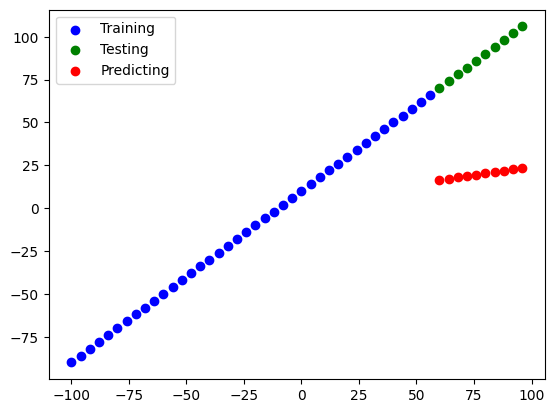

In [ ]:
plot_prediction(predictions=y_pred3)

In [ ]:
our_results = [["model_1", mae(y_test,y_pred1).numpy()],
                ["model_2", mae(y_test,y_pred2).numpy()],
                ["model_3", mae(y_test,y_pred3).numpy()]]
pd.DataFrame(our_results, columns = ["Models","Mae"])

,Models,Mae
0,model_1,8.579647
1,model_2,2.056355
2,model_3,67.999222


## Saving our model to use it in any other machines or environments

## There are two main formats to save our model

## 1. savemodel format
## 2. HDF5 format (Hierarchical Data Format) - Used to store or organize LARGE amount of Data

In [ ]:
# Save best model using savemodel format
model_2.save("best_model_SaveModel_format")

In [ ]:
#  Save model Using HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a Saved model

In [ ]:
# Loading in SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SaveModel_format")

# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(x_test)
saved_model_preds = loaded_SavedModel_format.predict(x_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 84ms/step


True

Loading in from the HDF5 is much the same.

In [ ]:
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")

# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(x_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 89ms/step


True

## Download the model (or any file) from Google Colab

Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:
* Right click on the file in the files pane and click 'download'.
* Use the code below.

In [ ]:
# Download a File from google colab

from google.colab import files
# files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Solving Regression Preblems With ["Medical Cost Dataset"](https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv)

In [ ]:
# Import Necessary Libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
x,y = data.drop(columns = "charges"), data["charges"]
x.shape,y.shape

((1338, 6), (1338,))

In [ ]:
x = pd.get_dummies(x)
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
# Splitting Data into Train and Test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [ ]:
# Creating a Model
tf.random.set_seed(42)
insurance = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compiling the Model
insurance.compile(loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# Fitting The Model
insurance_plt = insurance.fit(x_train,y_train, epochs=100, verbose=0)

In [ ]:
insurance.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8640.5459 - mae: 8640.5459


[8640.5458984375, 8640.5458984375]

In [ ]:
# pd.DataFrame(insurance_plt.history).plot()
# plt.xlabel("Loss")
# plt.ylabel("Epochs")

In [ ]:
# Creating other Model With Adam Optimizer and 3 Layers
# set seed
tf.random.set_seed(42)

# create the model
insurance1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compiling the model
insurance1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# fitting the model
insurance1_plt = insurance1.fit(x_train,y_train,epochs=300,verbose = 0)

In [ ]:
ins1_mae = insurance1.evaluate(x_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3207.2434 - mae: 3207.2434


Text(0, 0.5, 'Epochs')

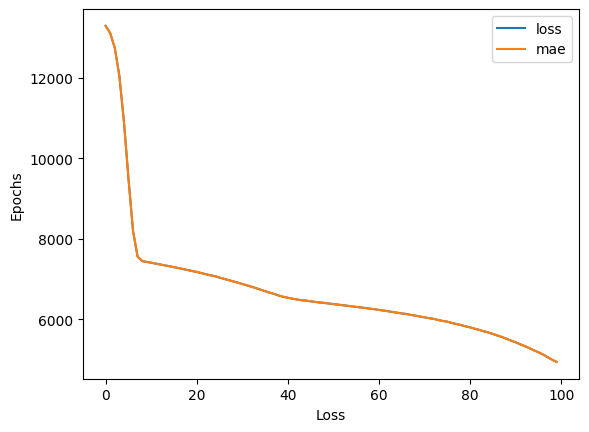

In [ ]:
# pd.DataFrame(insurance1_plt.history).plot()
# plt.xlabel("Loss")
# plt.ylabel("Epochs")

### Let's Normalize The Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)

x,y = data.drop(columns="charges"),data["charges"]

x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

preprocessor.fit(x_train)

x_train_norm = preprocessor.transform(x_train)
x_test_norm = preprocessor.transform(x_test)

In [ ]:
# Set Seed
tf.random.set_seed(42)

# create the model
insurance2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile The Model
insurance2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# Fitting The Model
insurance2_plt = insurance2.fit(x_train_norm,y_train, epochs = 200, verbose=0)

In [ ]:
ins2_mae = insurance2.evaluate(x_test_norm,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3175.0071 - mae: 3175.0071


In [ ]:
ins1_mae[0],ins2_mae[0]

(3207.243408203125, 3175.007080078125)

## We can say that Normalized data is more effective to get results(accuracy) rather than get_dummies

In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import MinMaxScaler

# Load the Boston Housing dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


# Before Normalizing The Data

In [ ]:
# set seed value
tf.random.set_seed(42)

# Create a model
boston = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the Model
boston.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr = 0.001),
    metrics= ["mae"]
)

#fitting the model
boston.fit(x_train,y_train,epochs=300,verbose=0)

In [ ]:
# Evaluating The Model
boston_mae = boston.evaluate(x_test,y_test,verbose=0)
boston_mae

[3.1126930713653564, 3.1126930713653564]

<!--  -->
# After Normalizing Data

In [ ]:
 # Normalizing Data
scalar = MinMaxScaler()
x_train_norm = scalar.fit_transform(x_train)
x_test_norm = scalar.transform(x_test)

In [ ]:
# set seed value
tf.random.set_seed(42)

# Create a model
boston1 = tf.keras.Sequential([
     tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the Model
boston1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics= ["mae"]
)

#fitting the model
boston1_plt=boston1.fit(x_train_norm,y_train,epochs=500,verbose=0)

In [ ]:
# Evaluating The Model
boston1_mae = boston1.evaluate(x_test_norm,y_test,verbose=0)
boston1_mae

[2.4142370223999023, 2.4142370223999023]

<Axes: >

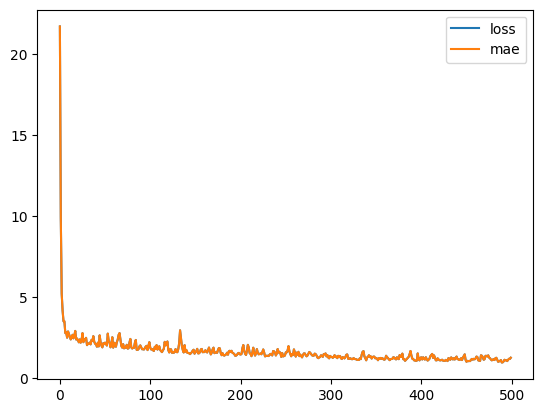

In [ ]:
pd.DataFrame(boston1_plt.history).plot()